In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and filter 

In [13]:
df = pd.read_csv('output/training_logs.csv')
# df = df[]

# shorten all runs to max 30 epochs
df = df[df['Epoch']<=30]

# drop all runs which have less than 3 epochs
df = df.groupby(['model', 'timestamp']).filter(lambda x: len(x)>=3)
df

,timestamp,model,Training Loss,Epoch,Step,Validation Loss,Accuracy,F1,model_path,samples_per_s,steps_per_s,colab,per_device_train_batch_size,per_device_eval_batch_size,split,target_map,binary,balanced
0,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.965,1.0,254,0.749,0.698,0.457,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
1,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.738,2.0,508,1.252,0.420,0.345,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
2,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.492,3.0,762,0.978,0.636,0.448,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
3,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.288,4.0,1016,2.421,0.501,0.388,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
4,2024-04-14_21-14,michellejieli/emotion_text_classifier,0.172,5.0,1270,2.449,0.558,0.413,output/models/michellejieli/emotion_text_class...,39.854,4.992,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2024-04-15_02-14,camembert-base,0.772,6.0,10524,0.771,0.683,0.271,output/models/camembert-base_2024-04-15_02-14,161.838,20.234,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,False
186,2024-04-15_02-14,camembert-base,0.772,7.0,12278,0.770,0.683,0.271,output/models/camembert-base_2024-04-15_02-14,161.838,20.234,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,False
187,2024-04-15_02-14,camembert-base,0.771,8.0,14032,0.770,0.683,0.271,output/models/camembert-base_2024-04-15_02-14,161.838,20.234,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,False
188,2024-04-15_02-14,camembert-base,0.772,9.0,15786,0.770,0.683,0.271,output/models/camembert-base_2024-04-15_02-14,161.838,20.234,False,8,64,"(0.8, 0.1, 0.1)","{'Negative': 0, 'No_pathos': 1, 'Positive': 2}",False,False


In [14]:
last_n_runs = 2

best = df.groupby(['model', 'timestamp'])['F1'].max()
best

# timestamp.sort_values(ascending=False).unique()[:last_n_runs]
# grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])
# 
# # Individual subplots
# fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(20, 10))
# for (group_name, group_df), ax in zip(grouped, axes):
#     group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{group_name}").legend(loc='upper left')
# 
# plt.tight_layout()
# plt.suptitle("Subplots")
# plt.show()

model                                  timestamp       
camembert-base                         2024-04-15_01-38    0.465
                                       2024-04-15_01-50    0.622
                                       2024-04-15_02-04    0.389
                                       2024-04-15_02-14    0.271
distilbert-base-cased                  2024-04-15_01-06    0.585
                                       2024-04-15_01-14    0.666
                                       2024-04-15_01-22    0.421
                                       2024-04-15_01-30    0.523
distilbert-base-uncased                2024-04-14_21-48    0.434
                                       2024-04-14_21-57    0.680
                                       2024-04-14_22-05    0.619
flaubert/flaubert_base_cased           2024-04-15_00-13    0.465
                                       2024-04-15_00-26    0.406
                                       2024-04-15_00-41    0.282
                                  

## Check latest

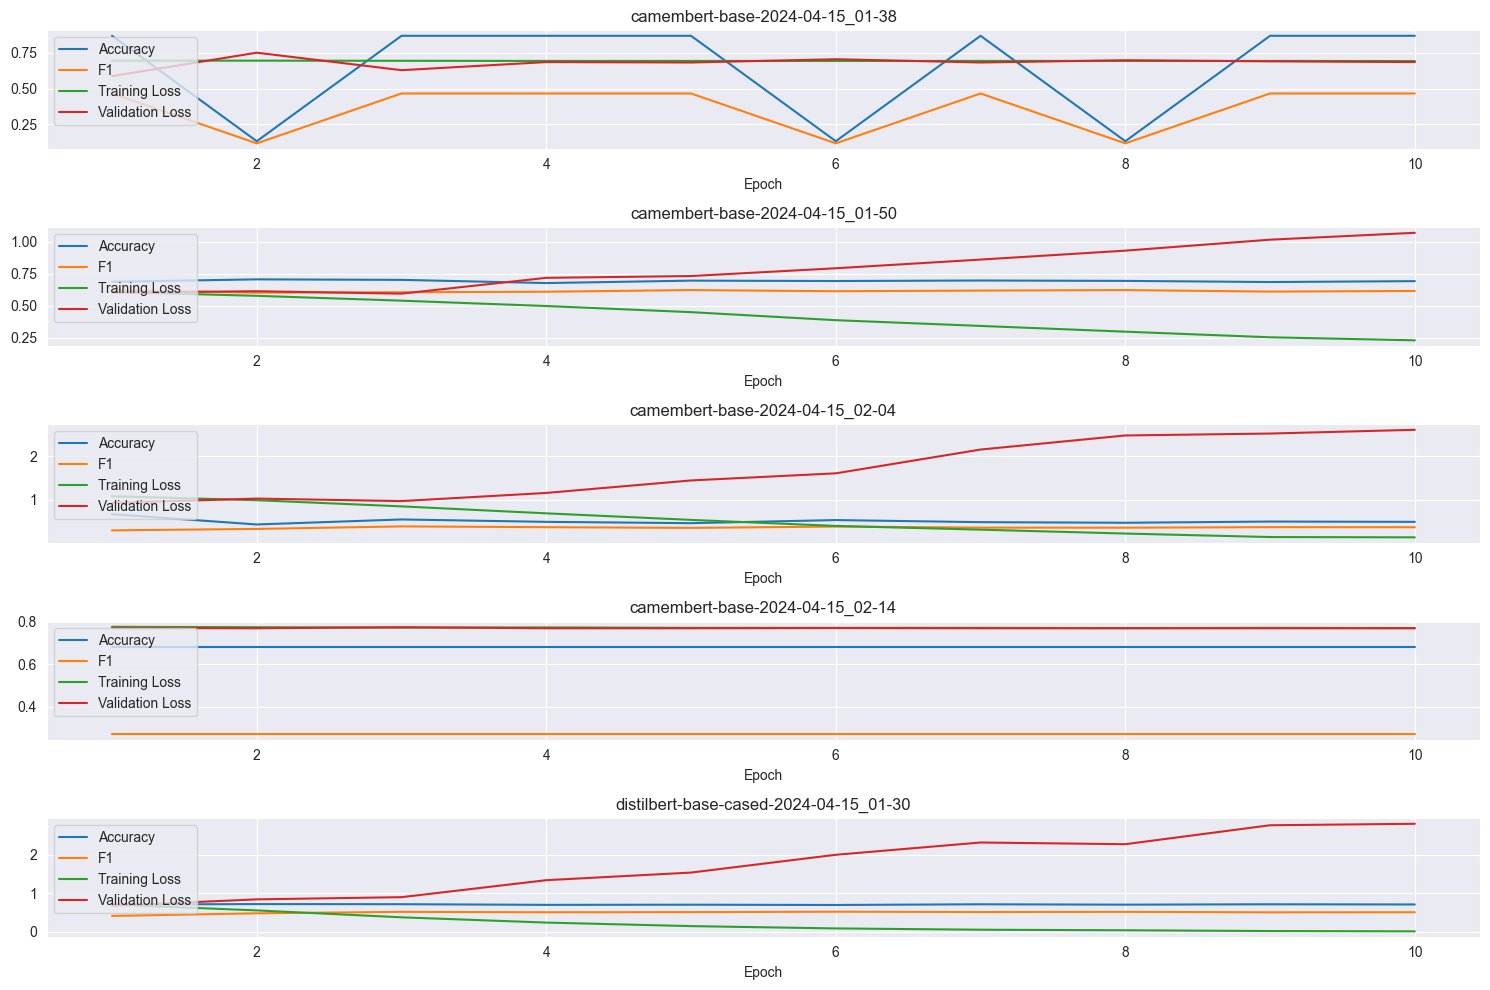

In [15]:
last_n_runs = 5

# pd.to_datetime(df.timestamp, format="%Y-%m-%d_%H-%M").sort_values(ascending=False).unique()
last_n = df.timestamp.sort_values(ascending=False).unique()[:last_n_runs]
grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])

# Individual subplots
fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(15, 10))
for (group_name, group_df), ax in zip(grouped, axes):
    group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{"-".join(group_name)}").legend(loc='upper left')

plt.tight_layout()
plt.show()

# Plot all

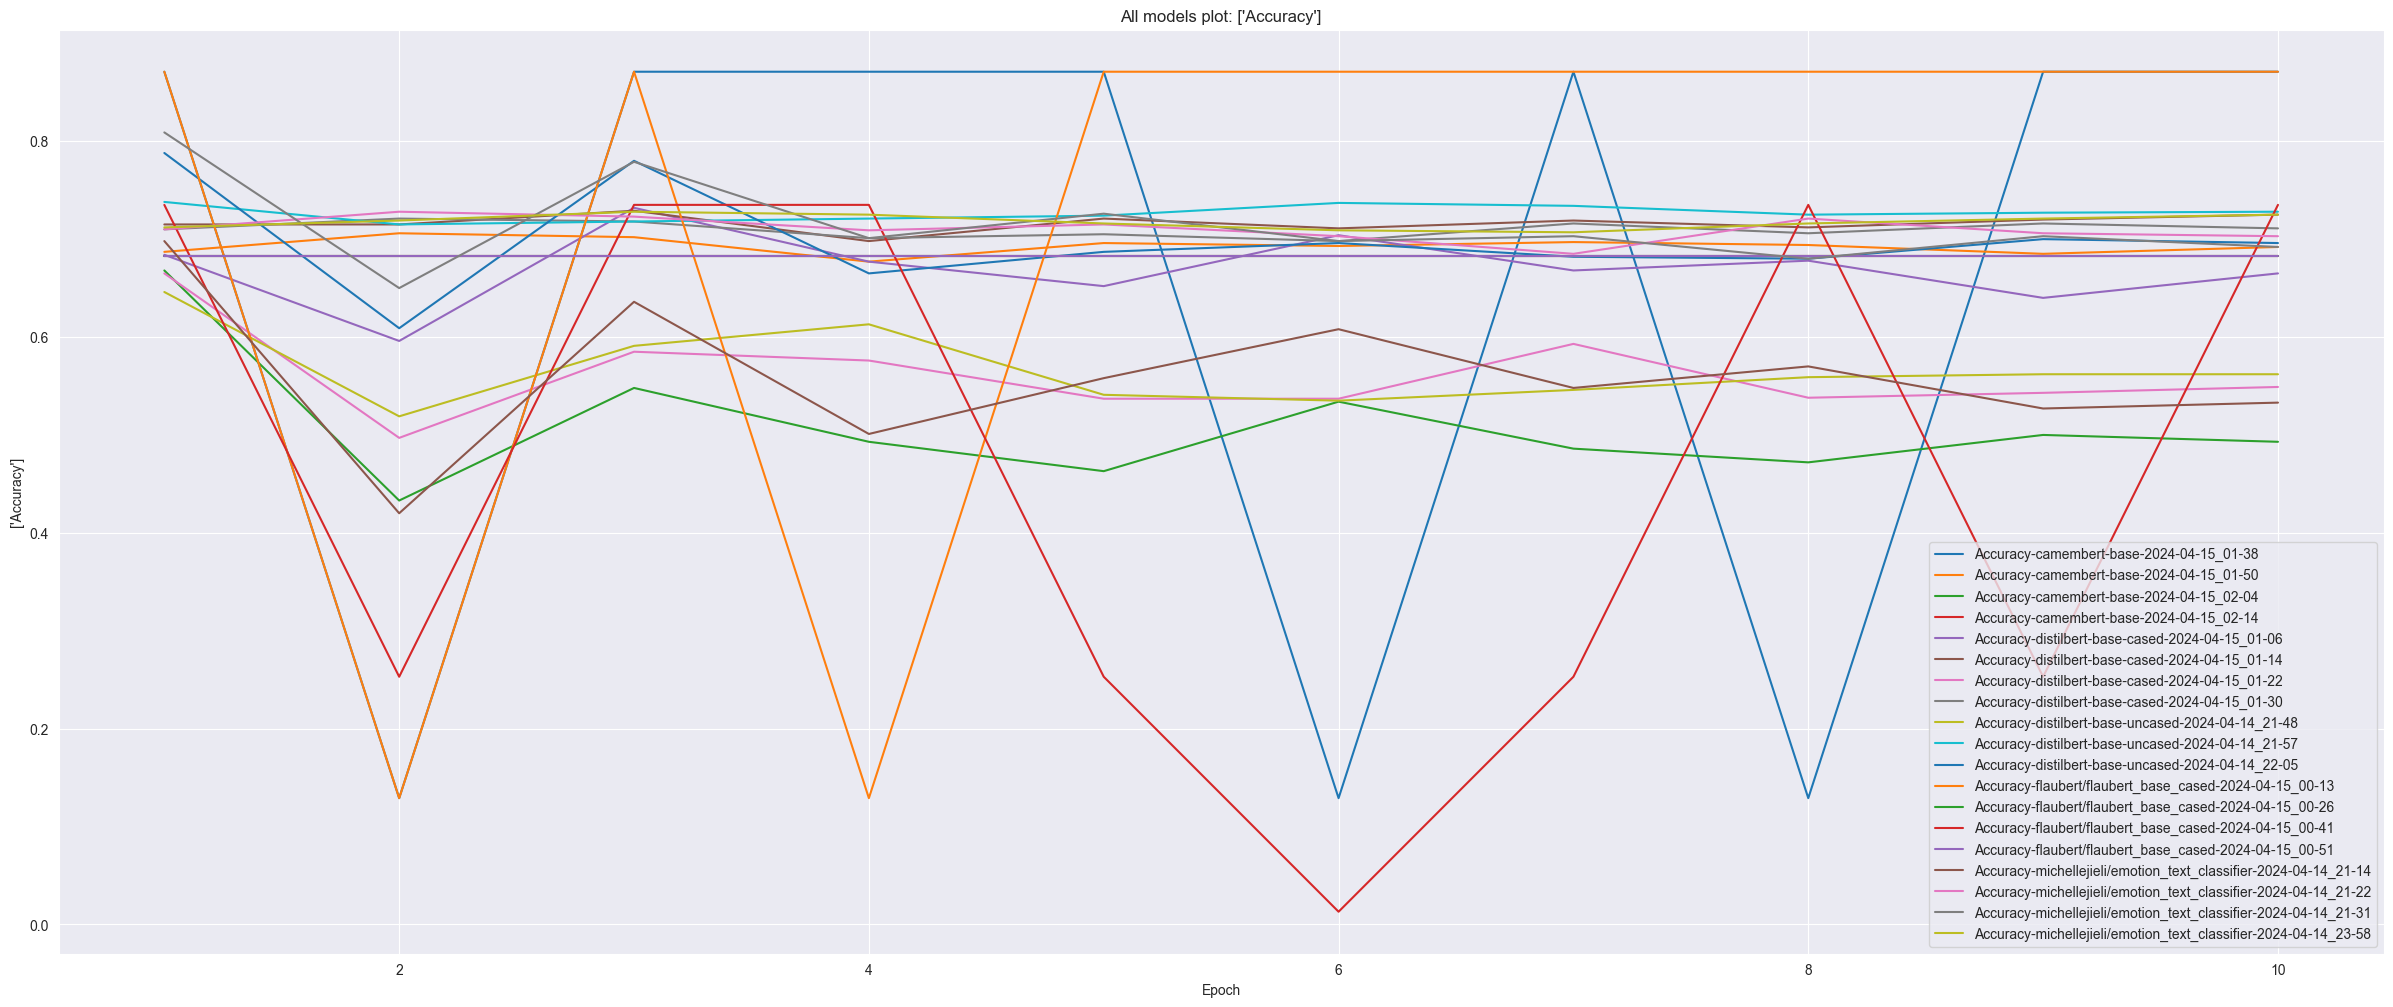

In [18]:
col_to_plot = ['Accuracy']
grouped = df.groupby(['model', 'timestamp'])

plt.figure(figsize=(30,12))
for name, group_df in grouped:
    ls = ['solid', 'dashed', 'dashdot', 'dotted']
    for i, col in enumerate(col_to_plot):
        plt.plot(group_df['Epoch'], group_df[col], label=f'{col}-{"-".join(name)}', linestyle=ls[i])

plt.xlabel('Epoch')
plt.ylabel(col_to_plot)
plt.title(f'All models plot: {col_to_plot}')
plt.legend()
plt.show()